# Buoyancy fluxes

Why are there buoyancy fluxes that are opposite of expected away from the ridge?

** include background**


In [1]:
# load modules 

import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.colors import LogNorm
%matplotlib inline
import os 
from xgcm import Grid
from xarrayutils import aggregate
import copy
# Pseudo Inversion 
from scipy.linalg import pinv, eig 

In [2]:
# load time averaged model variables
ds_model = xr.open_dataset('model_trac_restore_tave.nc')

In [3]:
# vars for plotting
X = ds_model.XC/1e3
Y = ds_model.YC/1e3
Z = ds_model.Z

In [5]:
ds_model.var

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:    (XC: 400, XG: 400, YC: 400, YG: 400, Z: 40, Zl: 40, Zp1: 41, Zu: 40)
Coordinates:
  * XC         (XC) float32 2500.0 7500.0 12500.0 ... 1992500.0 1997500.0
  * YC         (YC) float32 2500.0 7500.0 12500.0 ... 1992500.0 1997500.0
  * XG         (XG) float32 0.0 5000.0 10000.0 ... 1985000.0 1990000.0 1995000.0
  * YG         (YG) float32 0.0 5000.0 10000.0 ... 1985000.0 1990000.0 1995000.0
  * Z          (Z) float32 -5.0 -15.0 -25.0 -36.0 ... -2727.5 -2830.5 -2933.5
  * Zp1        (Zp1) float32 0.0 -10.0 -20.0 -30.0 ... -2779.0 -2882.0 -2985.0
  * Zu         (Zu) float32 -10.0 -20.0 -30.0 -42.0 ... -2779.0 -2882.0 -2985.0
  * Zl         (Zl) float32 0.0 -10.0 -20.0 -30.0 ... -2676.0 -2779.0 -2882.0
    rA         (YC, XC) float32 ...
    dxG        (YG, XC) float32 ...
    dyG        (YC, XG) float32 ...
    Depth      (YC, XC) float32 ...
    rAz        (YG, XG) float32 ...
   

In [12]:
VpTp = ds_model.VTtave - ds_model.VmeanC*ds_model.Ttave
UpTp = ds_model.VTtave - ds_model.UmeanC*ds_model.Ttave
WpTp = ds_model.WTtave - ds_model.WmeanC*ds_model.Ttave

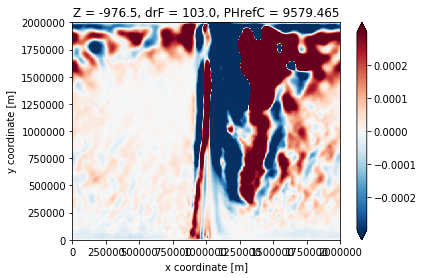

In [11]:
VpTp.sel(Z=-1000, method='nearest').plot(vmin=-0.0003)

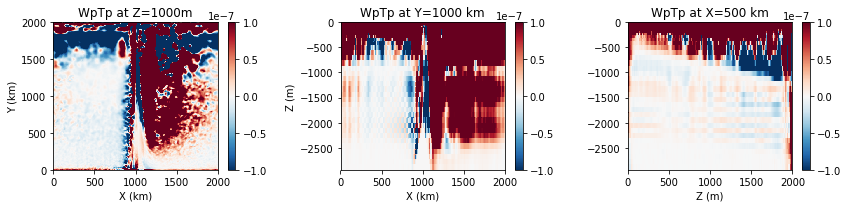

In [28]:
fig, ax = plt.subplots(1,3,figsize=(12,3))

im=ax[0].pcolormesh(X, Y, WpTp.sel(Z=-1000, method='nearest'), vmin=-1e-7, vmax=1e-7, cmap='RdBu_r')
ax[0].set_title('WpTp at Z=1000m')
fig.colorbar(im, ax = ax[0])
ax[0].set_xlabel('X (km)')
ax[0].set_ylabel('Y (km)')

im = ax[1].pcolormesh(X, Z, WpTp.sel(YC=1000e3, method='nearest'), vmin=-1e-7, vmax=1e-7, cmap='RdBu_r')
ax[1].set_title('WpTp at Y=1000 km')
fig.colorbar(im , ax = ax[1])
ax[1].set_xlabel('X (km)')
ax[1].set_ylabel('Z (m)')

im = ax[2].pcolormesh(Y, Z, WpTp.sel(XC=500e3, method='nearest'), vmin=-1e-7, vmax=1e-7, cmap='RdBu_r')
ax[2].set_title('WpTp at X=500 km')
fig.colorbar(im , ax = ax[2])
ax[2].set_xlabel('Y (km)')
ax[2].set_xlabel('Z (m)')

plt.tight_layout()
plt.savefig('wptp.png')